# Emergency Calls - Data Visualization Project

In [193]:
import numpy as np
import pandas as pd

#Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

# For Notebooks
init_notebook_mode(connected=True)

import plotly 
plotly.tools.set_credentials_file(username='petertea96', api_key='RHh3850wtOVu8O2qQ8RE')

In [8]:
Emergency_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


In [194]:
Emergency_data = pd.read_csv("911.csv") # Read in the data
Emergency_data.head() # Look at first 5 rows of data


### ----- Brief Description of variables ----- ###
#https://www.kaggle.com/mchirico/montcoalert/version/50
#lat = Latitude
#lng = Longitude
#desc = Description of Emergency
#zip = ZIP Code
#title = Title of Emergency
#timeStamp = Date and time of the call
#twp= Town
#addr = Adress
#e = Indicator, just has numeric 1 in all of its rows

### ----- Brief Description of variables ----- ###

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Calculate some summary statistics to get a better feel for this data.

In [195]:
#--> Caclculate some summary statistics to get a better feel for this data.

# 5 Most frequent Zip codes in this dataset:
Emergency_data['zip'].value_counts(dropna=True).iloc[0:5]

19401.0    28656
19464.0    27948
19403.0    21631
19446.0    20496
19406.0    14097
Name: zip, dtype: int64

In [196]:
# Which town experienced the highest amount of 911 calls?
Emergency_data['twp'].value_counts(dropna=True).iloc[0:5]

LOWER MERION    36441
ABINGTON        25835
NORRISTOWN      23883
UPPER MERION    22694
CHELTENHAM      19629
Name: twp, dtype: int64

In [197]:
#Number of different reasons for 911 calls?
Emergency_data['title'].nunique()



141

### Create new Feature in dataset

In [198]:
#--> Create new feature of dataset;
# We want a tidier column outlining reason for 911 call. (EMS, fire or Traffic);
# I'll call this new column 'Reason_for_call'

Emergency_data['Reason_for_call'] = Emergency_data['title'].apply(lambda my_string: my_string.split(':')[0]) 
#This returns first word of each string (will always be EMS, fire or Traffic)

Emergency_data.head()
#Check if code worked


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason_for_call
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [199]:
#Calculate most common reason for calling 911, using this new feature.
Emergency_data['Reason_for_call'].value_counts()

EMS        208676
Traffic    151458
Fire        63775
Name: Reason_for_call, dtype: int64

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Reason for 911 call'),
 Text(0.5, 1.0, 'Counts of Type of Distress Calls')]

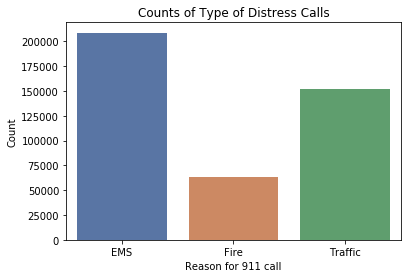

In [200]:
# Visualize these counts with seaborn countplot
sns.set_palette("deep")
Emergency_plot = sns.countplot(x='Reason_for_call',data=Emergency_data)
Emergency_plot.set(xlabel='Reason for 911 call', ylabel='Count', title = 'Counts of Type of Distress Calls')

### Analysis of Time Data

In [201]:
#--> Check data type of timeStamp column
Emergency_data.timeStamp.dtypes

#Note pandas dtype 'object' is python type 'str'

dtype('O')

In [202]:
#--> Convert timeStamp column from string to date
Emergency_data['Formatted_time']= pd.to_datetime(Emergency_data['timeStamp'])

Emergency_data.head()
#Check if code worked

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason_for_call,Formatted_time
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:10:52
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:29:21
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 14:39:21
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10 16:47:36
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10 16:56:52


In [203]:
#Create 3 new Features called Hour, Month, and Day of Week (of when the 911 call took place)

Emergency_data['Hour_call'] = Emergency_data['Formatted_time'].apply(lambda time: time.hour) 
Emergency_data['Month_call'] = Emergency_data['Formatted_time'].apply(lambda time: time.month) 
Emergency_data['Day_call'] = Emergency_data['Formatted_time'].apply(lambda time: time.dayofweek) 
#Note: 0 = Mon, 1 = Tue, ..., 6 = Sun

Emergency_data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason_for_call,Formatted_time,Hour_call,Month_call,Day_call
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:10:52,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:29:21,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 14:39:21,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10 16:47:36,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10 16:56:52,16,12,3


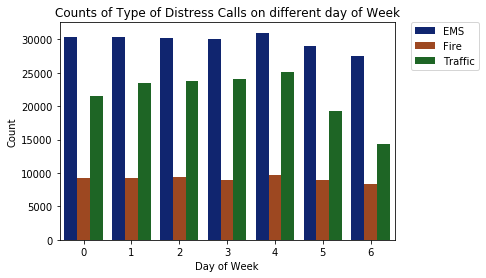

In [204]:
# --> How are the 911 calls distributed across the day of week? What if we stratified by type of distress call?
sns.set_palette("dark")
DayofWeek_plot = sns.countplot(x='Day_call',data=Emergency_data, hue = "Reason_for_call")
DayofWeek_plot.set(xlabel='Day of Week', ylabel='Count', title = 'Counts of Type of Distress Calls on different day of Week')

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

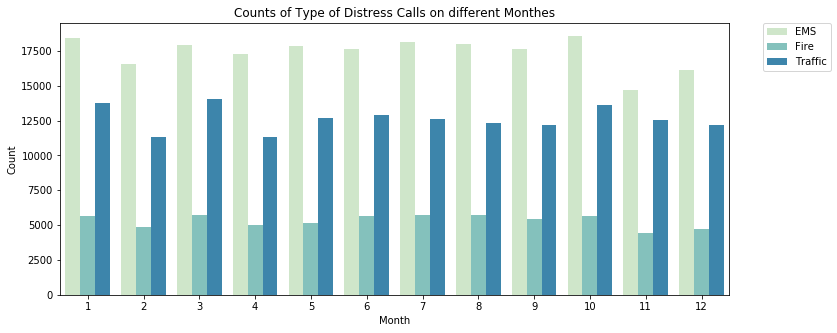

In [205]:
# --> How are the 911 calls distributed across different Monthes? What if we stratified by type of distress call?
#sns.palplot(sns.color_palette("GnBu", 3))
sns.set_palette("GnBu", 3)
plt.figure(figsize=(12, 5))

Month_plot = sns.countplot(x='Month_call',data=Emergency_data, hue = "Reason_for_call")
Month_plot.set(xlabel='Month', ylabel='Count', title = 'Counts of Type of Distress Calls on different Monthes')


# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [206]:
byMonth = Emergency_data.groupby('Month_call').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason_for_call,Formatted_time,Hour_call,Day_call
Month_call,,,,,,,,,,,,,
1,37824,37824,37824,33480,37824,37824,37812,37824,37824,37824,37824,37824,37824
2,32828,32828,32828,28963,32828,32828,32817,32828,32828,32828,32828,32828,32828
3,37666,37666,37666,33416,37666,37666,37651,37666,37666,37666,37666,37666,37666
4,33583,33583,33583,29488,33583,33583,33575,33583,33583,33583,33583,33583,33583
5,35644,35644,35644,31114,35644,35644,35628,35644,35644,35644,35644,35644,35644


C:\Users\Peter\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



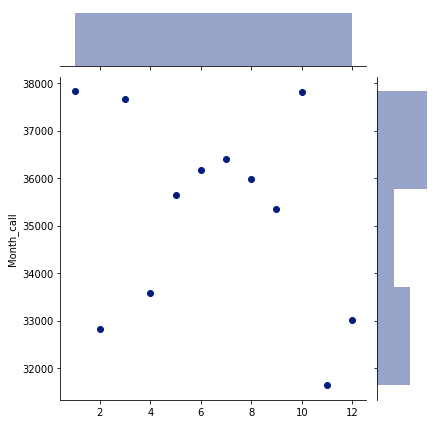

In [207]:
#--> How does the number of 911 calls change month-to-month?
sns.set_palette("dark")
Emergency_data['Month_call'].value_counts(sort=False)
sns.jointplot(x= np.arange(1,13), y = Emergency_data['Month_call'].value_counts(sort=False), kind="scatter")


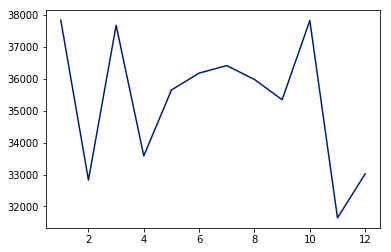

In [208]:
plt.plot(np.arange(1,13), Emergency_data['Month_call'].value_counts(sort=False))

In [250]:
#Clearly the relation is NOT LINEAR
#However, I'm curious on HOW to make a LINEAR PLOT...
Month_counts = Emergency_data.groupby('Month_call').count()
Month_counts.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason_for_call,Formatted_time,Hour_call,Day_call,Date
Month_call,,,,,,,,,,,,,,
1,37824,37824,37824,33480,37824,37824,37812,37824,37824,37824,37824,37824,37824,37824
2,32828,32828,32828,28963,32828,32828,32817,32828,32828,32828,32828,32828,32828,32828
3,37666,37666,37666,33416,37666,37666,37651,37666,37666,37666,37666,37666,37666,37666
4,33583,33583,33583,29488,33583,33583,33575,33583,33583,33583,33583,33583,33583,33583
5,35644,35644,35644,31114,35644,35644,35628,35644,35644,35644,35644,35644,35644,35644


In [252]:
#Now, we need to reset index column into an actual column. This will help with plotting...
Month_counts.reset_index(inplace=True)
Month_counts.head()


,index,Month_call,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason_for_call,Formatted_time,Hour_call,Day_call,Date
0,0,1,37824,37824,37824,33480,37824,37824,37812,37824,37824,37824,37824,37824,37824,37824
1,1,2,32828,32828,32828,28963,32828,32828,32817,32828,32828,32828,32828,32828,32828,32828
2,2,3,37666,37666,37666,33416,37666,37666,37651,37666,37666,37666,37666,37666,37666,37666
3,3,4,33583,33583,33583,29488,33583,33583,33575,33583,33583,33583,33583,33583,33583,33583
4,4,5,35644,35644,35644,31114,35644,35644,35628,35644,35644,35644,35644,35644,35644,35644


Text(0.5, 1.0, 'Nonsense graph...')

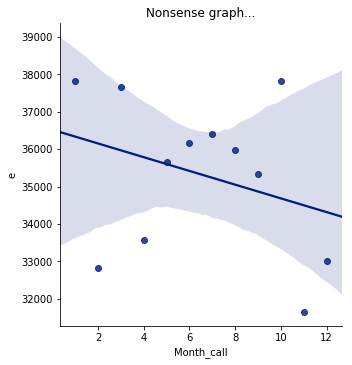

In [255]:
#Plot linear plot
sns.lmplot(x = 'Month_call', y = 'e', data = Month_counts)
plt.title("Nonsense graph...")

### Time Series Plot

In [226]:
Emergency_data['Date'] = Emergency_data['Formatted_time'].apply(lambda time: time.date()) 
# Extract Date data from timeStamp column

Emergency_data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason_for_call,Formatted_time,Hour_call,Month_call,Day_call,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:10:52,17,12,3,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:29:21,17,12,3,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 14:39:21,14,12,3,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10 16:47:36,16,12,3,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10 16:56:52,16,12,3,2015-12-10


In [258]:
Date_counts = Emergency_data.groupby('Date').count()
# Count how many calls occur on each date...
Date_counts.index #Date is the index of this dataframe...


(1073, 14)

In [ ]:
Date_counts.shape #Check dimensions of this data...

In [219]:
Date_counts.head() # The column 'e' represents the count of 911 calls on each Date

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason_for_call,Formatted_time,Hour_call,Month_call,Day_call
Date,,,,,,,,,,,,,,
2015-12-10,114,114,114,100,114,114,114,114,114,114,114,114,114,114
2015-12-11,391,391,391,332,391,391,391,391,391,391,391,391,391,391
2015-12-12,402,402,402,334,402,402,402,402,402,402,402,402,402,402
2015-12-13,316,316,316,279,316,316,316,316,316,316,316,316,316,316
2015-12-14,444,444,444,386,444,444,443,444,444,444,444,444,444,444


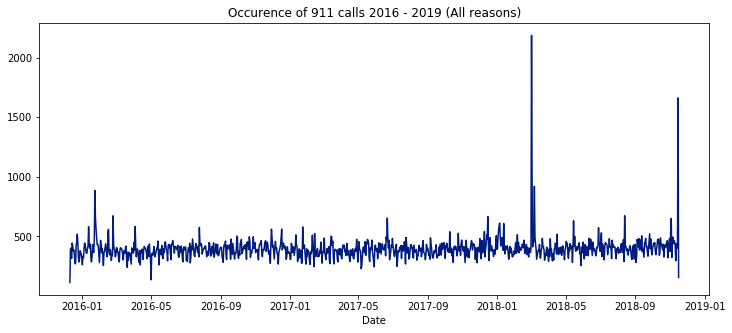

In [259]:
#Plot a tme series plot
Date_counts['e'].plot(figsize=(12, 5), title = "Occurence of 911 calls 2016 - 2019 (All reasons)")

### Now let's stratify plots by the 3 different reasons for the 911 call

In [264]:
# --> Now let's stratify plots by the 3 different reasons for the 911 call
Emergency_data.head()
#Emergency_data.groupby('Reason_for_call').head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason_for_call,Formatted_time,Hour_call,Month_call,Day_call,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:10:52,17,12,3,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:29:21,17,12,3,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 14:39:21,14,12,3,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10 16:47:36,16,12,3,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10 16:56:52,16,12,3,2015-12-10


In [274]:
#--> Filter data sets by Reason_for_call. 

#|--> Let's start with EMS

Date_EMS_counts = Emergency_data[Emergency_data['Reason_for_call'] == 'EMS'].groupby('Date').count()
#Date_EMS_counts.head()

#Now, we need to reset index column into an actual column. This will help with plotting...
Date_EMS_counts.reset_index(inplace=True)
Date_EMS_counts.head()


,Date,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason_for_call,Formatted_time,Hour_call,Month_call,Day_call
0,2015-12-10,58,58,58,53,58,58,58,58,58,58,58,58,58,58
1,2015-12-11,186,186,186,166,186,186,186,186,186,186,186,186,186,186
2,2015-12-12,188,188,188,170,188,188,188,188,188,188,188,188,188,188
3,2015-12-13,191,191,191,179,191,191,191,191,191,191,191,191,191,191
4,2015-12-14,221,221,221,200,221,221,221,221,221,221,221,221,221,221


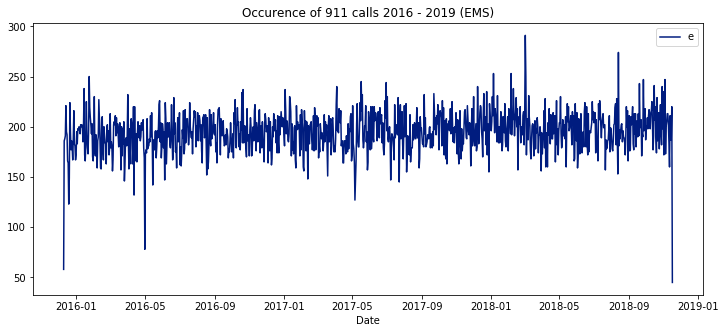

In [276]:
Date_EMS_counts.plot(x = 'Date', y = 'e', figsize=(12, 5), title = "Occurence of 911 calls 2016 - 2019 (EMS)")

In [279]:
#|--> Now do Fire

Date_Fire_counts = Emergency_data[Emergency_data['Reason_for_call'] == 'Fire'].groupby('Date').count()
#Date_Fire_counts.head()

#Now, we need to reset index column into an actual column. This will help with plotting...
Date_Fire_counts.reset_index(inplace=True)
#Date_Fire_counts.head()


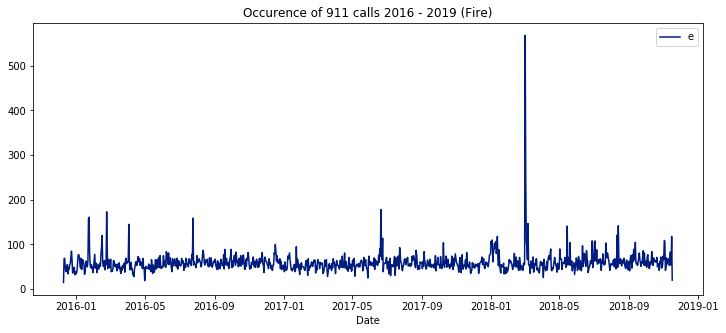

In [278]:
Date_Fire_counts.plot(x = 'Date', y = 'e', figsize=(12, 5), title = "Occurence of 911 calls 2016 - 2019 (Fire)")

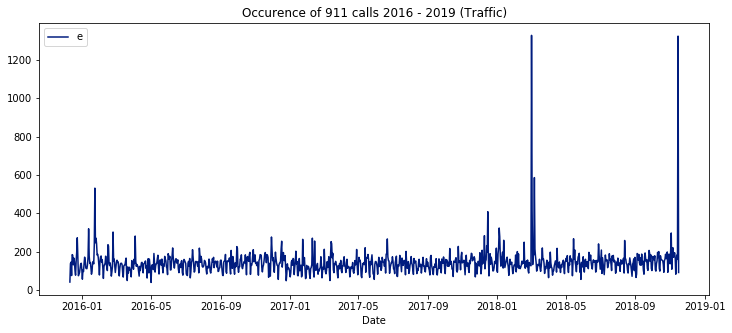

In [281]:
#|--> And finally do Traffic
Date_Traffic_counts = Emergency_data[Emergency_data['Reason_for_call'] == 'Traffic'].groupby('Date').count()
#Date_Fire_counts.head()

#Now, we need to reset index column into an actual column. This will help with plotting...
Date_Traffic_counts.reset_index(inplace=True)
#Date_Traffic_counts.head()
Date_Traffic_counts.plot(x = 'Date', y = 'e', figsize=(12, 5), title = "Occurence of 911 calls 2016 - 2019 (Traffic)")